In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
%matplotlib inline
%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams
rcParams['savefig.dpi'] = 550
rcParams['font.size'] = 20
plt.rc('font', family='serif')
import lsdb
import dask
dask.config.set({"temporary-directory" :'/epyc/ssd/users/atzanida/tmp'})
import dask.dataframe as dd
from tape import Ensemble, ColumnMapper

In [4]:
# Initialize an Ensemble
ens = Ensemble(memory_limit=1e11, n_workers=12)
ens.client_info()

/epyc/users/atzanida/anaconda3/envs/lsdb_demo_true/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46797 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:46797/status,
Dashboard: http://127.0.0.1:46797/status,Workers: 12
Total threads: 96,Total memory: 1.09 TiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45932,Workers: 12
Dashboard: http://127.0.0.1:46797/status,Total threads: 96
Started: Just now,Total memory: 1.09 TiB
Comm: tcp://127.0.0.1:41938,Total threads: 8
Dashboard: http://127.0.0.1:35867/status,Memory: 93.13 GiB
Nanny: tcp://127.0.0.1:45044,


In [5]:
# ColumnMapper Establishes which table columns map to timeseries quantities
colmap = ColumnMapper(
        id_col='_hipscat_index',
        time_col='mjd',
        flux_col='mag',
        err_col='magerr',
        band_col='band',
      )

In [6]:
table = pd.read_parquet("/astro/users/atzanida/lrg_data/boyajiansearch/500kdir/demo_sample.pq", 
                       engine='pyarrow')

In [16]:
count, bns = np.histogram(table['Ndips'], bins=np.arange(0, 10, step=1))

Text(0, 0.5, 'N$_{src}$')

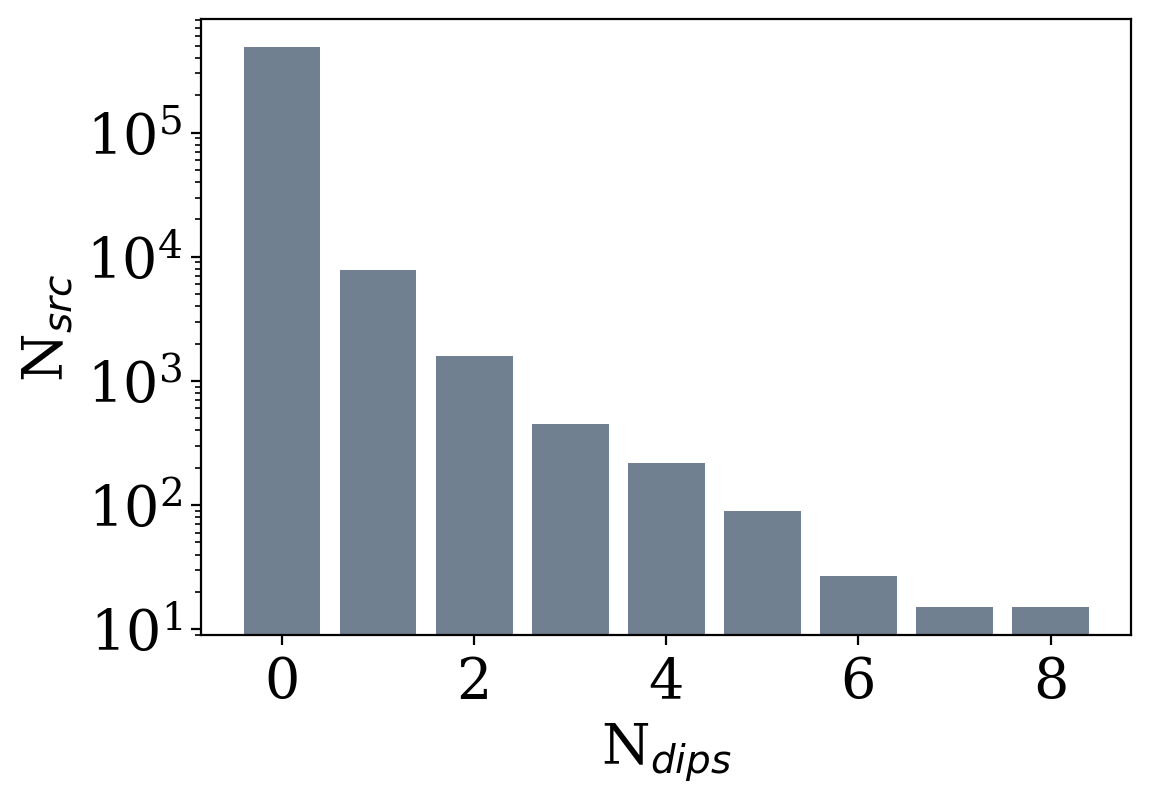

In [33]:
plt.figure(figsize=(6,4))
plt.bar(range(0, 9), count, color='slategray')
plt.yscale('log')
plt.xlabel("N$_{dips}$")
plt.ylabel("N$_{src}$")

In [65]:
bb = np.arange(table['bp_rp_gaia'].min(), table['bp_rp_gaia'].max(), step=0.35)

Text(0.5, 0, 'G$_{BP}$-G$_{RP}$')

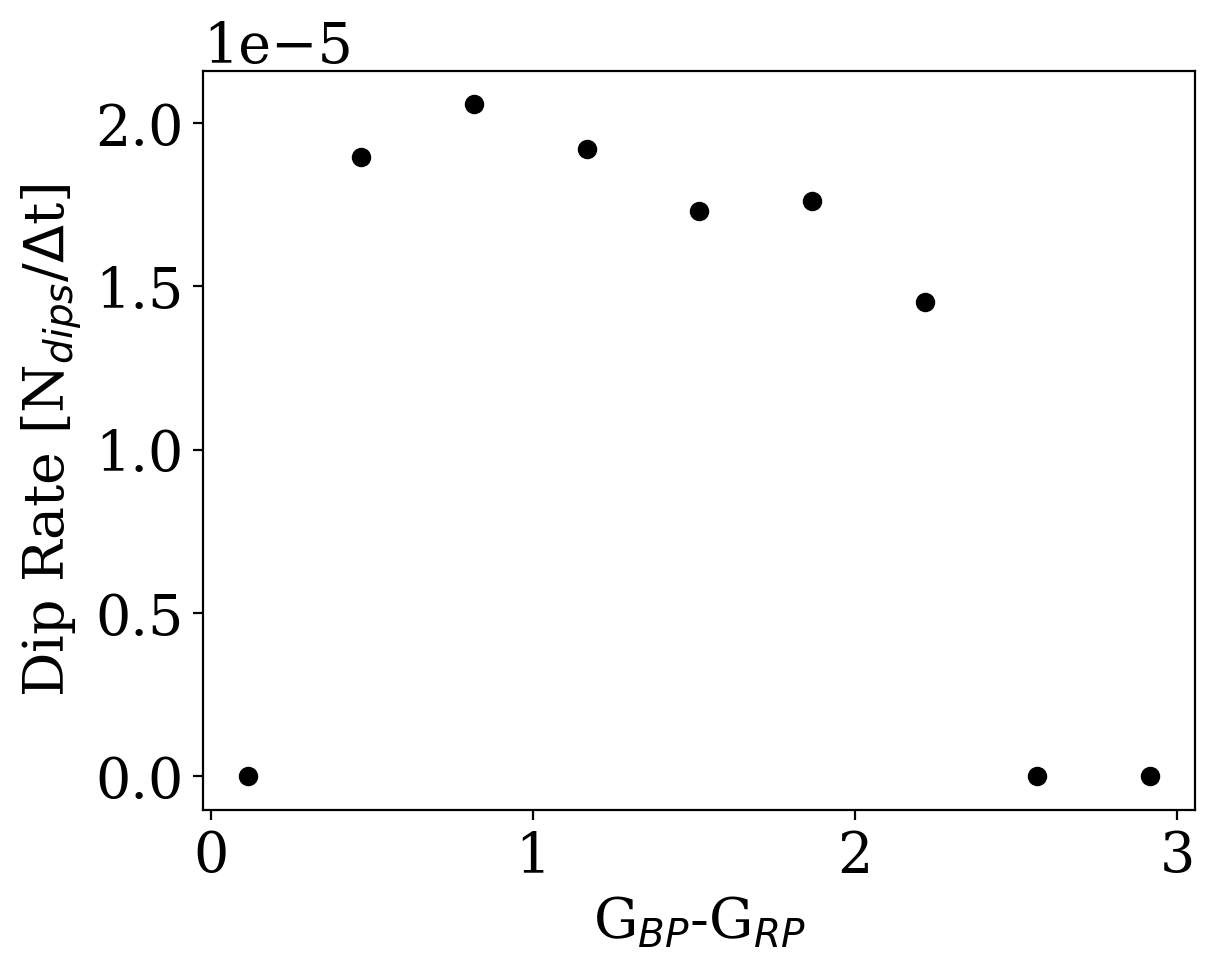

In [90]:
for i in range (0, len(bb)-1):
    bw = (table['bp_rp_gaia']>bb[i]) & (table['bp_rp_gaia']<bb[i+1])
    
    j = table[bw]
    
    plt.scatter(bb[i], np.mean(j['Rate_dip']), color='k')
    
plt.ylabel("Dip Rate [N$_{dips}$/$\Delta$t]")
plt.xlabel("G$_{BP}$-G$_{RP}$")

In [96]:
col_keys = ['solution_id_gaia',
'designation_gaia',
'source_id_gaia',
'random_index_gaia',
'ref_epoch_gaia',
'ra_gaia',
'ra_error_gaia',
'dec_gaia',
'dec_error_gaia',
'parallax_gaia',
'parallax_error_gaia',
'parallax_over_error_gaia',
'pm_gaia',
'pmra_gaia',
'pmra_error_gaia',
'pmdec_gaia',
'pmdec_error_gaia',
'ra_dec_corr_gaia',
'ra_parallax_corr_gaia',
'ra_pmra_corr_gaia',
'ra_pmdec_corr_gaia',
'dec_parallax_corr_gaia',
'dec_pmra_corr_gaia',
'dec_pmdec_corr_gaia',
'parallax_pmra_corr_gaia',
'parallax_pmdec_corr_gaia',
'pmra_pmdec_corr_gaia',
'astrometric_n_obs_al_gaia',
'astrometric_n_obs_ac_gaia',
'astrometric_n_good_obs_al_gaia',
'astrometric_n_bad_obs_al_gaia',
'astrometric_gof_al_gaia',
'astrometric_chi2_al_gaia',
'astrometric_excess_noise_gaia',
'astrometric_excess_noise_sig_gaia',
'astrometric_params_solved_gaia',
'astrometric_primary_flag_gaia',
'nu_eff_used_in_astrometry_gaia',
'pseudocolour_gaia',
'pseudocolour_error_gaia',
'ra_pseudocolour_corr_gaia',
'dec_pseudocolour_corr_gaia',
'parallax_pseudocolour_corr_gaia',
'pmra_pseudocolour_corr_gaia',
'pmdec_pseudocolour_corr_gaia',
'astrometric_matched_transits_gaia',
'visibility_periods_used_gaia',
'astrometric_sigma5d_max_gaia',
'matched_transits_gaia',
'new_matched_transits_gaia',
'matched_transits_removed_gaia',
'ipd_gof_harmonic_amplitude_gaia',
'ipd_gof_harmonic_phase_gaia',
'ipd_frac_multi_peak_gaia',
'ipd_frac_odd_win_gaia',
'ruwe_gaia',
'scan_direction_strength_k1_gaia',
'scan_direction_strength_k2_gaia',
'scan_direction_strength_k3_gaia',
'scan_direction_strength_k4_gaia',
'scan_direction_mean_k1_gaia',
'scan_direction_mean_k2_gaia',
'scan_direction_mean_k3_gaia',
'scan_direction_mean_k4_gaia',
'duplicated_source_gaia',
'phot_g_n_obs_gaia',
'phot_g_mean_flux_gaia',
'phot_g_mean_flux_error_gaia',
'phot_g_mean_flux_over_error_gaia',
'phot_g_mean_mag_gaia',
'phot_bp_n_obs_gaia',
'phot_bp_mean_flux_gaia',
'phot_bp_mean_flux_error_gaia',
'phot_bp_mean_flux_over_error_gaia',
'phot_bp_mean_mag_gaia',
'phot_rp_n_obs_gaia',
'phot_rp_mean_flux_gaia',
'phot_rp_mean_flux_error_gaia',
'phot_rp_mean_flux_over_error_gaia',
'phot_rp_mean_mag_gaia',
'phot_bp_rp_excess_factor_gaia',
'phot_bp_n_contaminated_transits_gaia',
'phot_bp_n_blended_transits_gaia',
'phot_rp_n_contaminated_transits_gaia',
'phot_rp_n_blended_transits_gaia',
'phot_proc_mode_gaia',
'bp_rp_gaia',
'bp_g_gaia',
'g_rp_gaia',
'radial_velocity_gaia',
'radial_velocity_error_gaia',
'rv_method_used_gaia',
'rv_nb_transits_gaia',
'rv_nb_deblended_transits_gaia',
'rv_visibility_periods_used_gaia',
'rv_expected_sig_to_noise_gaia',
'rv_renormalised_gof_gaia',
'rv_chisq_pvalue_gaia',
'rv_time_duration_gaia',
'rv_amplitude_robust_gaia',
'rv_template_teff_gaia',
'rv_template_logg_gaia',
'rv_template_fe_h_gaia',
'rv_atm_param_origin_gaia',
'vbroad_gaia',
'vbroad_error_gaia',
'vbroad_nb_transits_gaia',
'grvs_mag_gaia',
'grvs_mag_error_gaia',
'grvs_mag_nb_transits_gaia',
'rvs_spec_sig_to_noise_gaia',
'phot_variable_flag_gaia',
'l_gaia',
'b_gaia',
'ecl_lon_gaia',
'ecl_lat_gaia',
'in_qso_candidates_gaia',
'in_galaxy_candidates_gaia',
'non_single_star_gaia',
'has_xp_continuous_gaia',
'has_xp_sampled_gaia',
'has_rvs_gaia',
'has_epoch_photometry_gaia',
'has_epoch_rv_gaia',
'has_mcmc_gspphot_gaia',
'has_mcmc_msc_gaia',
'in_andromeda_survey_gaia',
'classprob_dsc_combmod_quasar_gaia',
'classprob_dsc_combmod_galaxy_gaia',
'classprob_dsc_combmod_star_gaia',
'teff_gspphot_gaia',
'teff_gspphot_lower_gaia',
'teff_gspphot_upper_gaia',
'logg_gspphot_gaia',
'logg_gspphot_lower_gaia',
'logg_gspphot_upper_gaia',
'mh_gspphot_gaia',
'mh_gspphot_lower_gaia',
'mh_gspphot_upper_gaia',
'distance_gspphot_gaia',
'distance_gspphot_lower_gaia',
'distance_gspphot_upper_gaia',
'azero_gspphot_gaia',
'azero_gspphot_lower_gaia',
'azero_gspphot_upper_gaia',
'ag_gspphot_gaia',
'ag_gspphot_lower_gaia',
'ag_gspphot_upper_gaia',
'ebpminrp_gspphot_gaia',
'ebpminrp_gspphot_lower_gaia',
'ebpminrp_gspphot_upper_gaia',
'libname_gspphot_gaia',
'Norder_gaia',
'Npix_gaia',
'Dir_gaia',
'ps1_objid_ztf_dr14',
'ra_ztf_dr14',
'dec_ztf_dr14',
'ps1_gMeanPSFMag_ztf_dr14',
'ps1_rMeanPSFMag_ztf_dr14',
'ps1_iMeanPSFMag_ztf_dr14',
'nobs_g_ztf_dr14',
'nobs_r_ztf_dr14',
'nobs_i_ztf_dr14',
'mean_mag_g_ztf_dr14',
'mean_mag_r_ztf_dr14',
'mean_mag_i_ztf_dr14',
'Norder_ztf_dr14',
'Dir_ztf_dr14',
'Npix_ztf_dr14',
'_DIST',
'Norder',
'Dir',
'Npix',
'biweight_scale',
'frac_above_2_sigma',
'M_stat',
'Ndips',
'Rate_dip',
'best_dip_power',
'best_dip_frac1sig',
'loc_dip_back',
'loc_dip_forward',
'dip_cent',
'integral_score',
'gp_logsum_err',
'left_integral_error',
'right_integral_error',]


(19.42253905, 8.511791950000001)

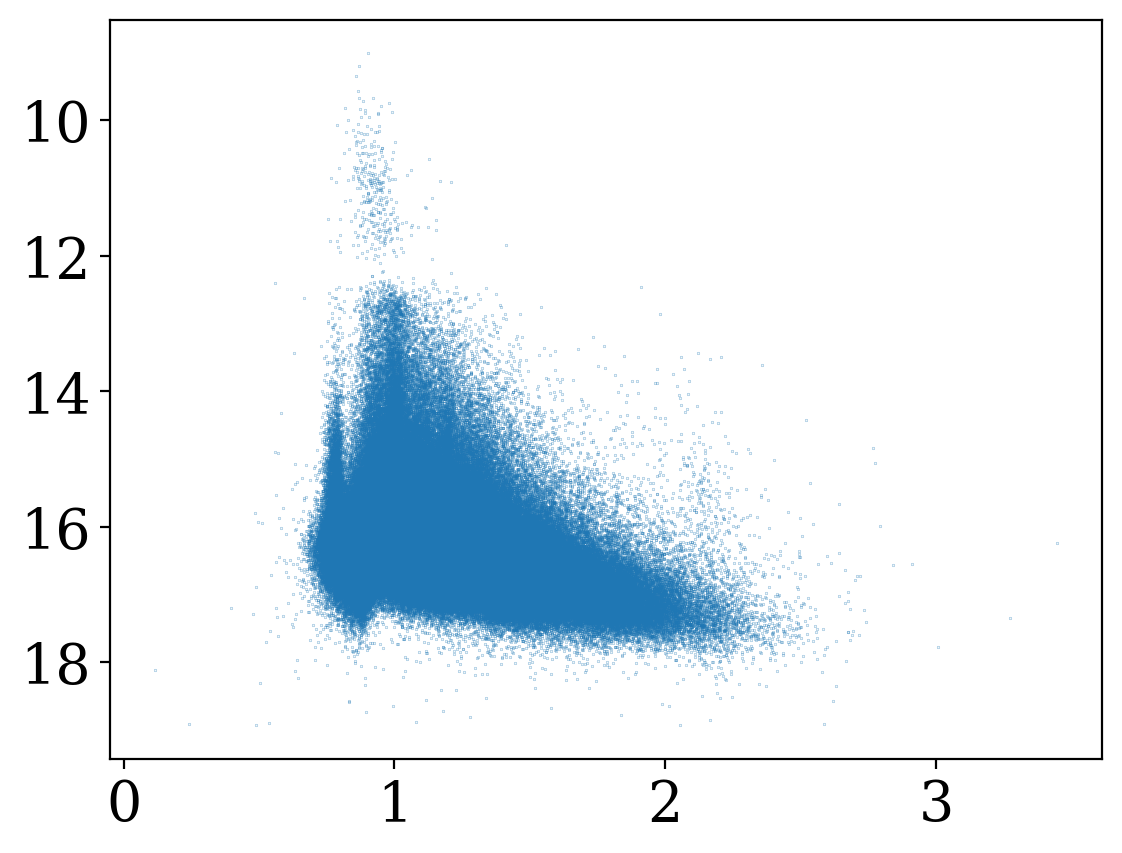

In [103]:
plt.scatter(table['bp_rp_gaia'], table['phot_g_mean_mag_gaia'], s=.01)
plt.ylim(plt.ylim()[::-1])

In [173]:
from scipy.stats import binned_statistic_2d

def dist_modM(abs_mag, distance):
    return abs_mag - 5*np.log10(distance/10)

In [174]:
H = binned_statistic_2d(table['bp_rp_gaia'], table['phot_g_mean_mag_gaia'], (table['best_dip_power']),
                       bins=(50, 50))

/tmp/ipykernel_62175/3465816076.py:20: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  lgnd.legendHandles[0]._sizes = [65]


Text(0, 0.5, 'M$_{G}$')

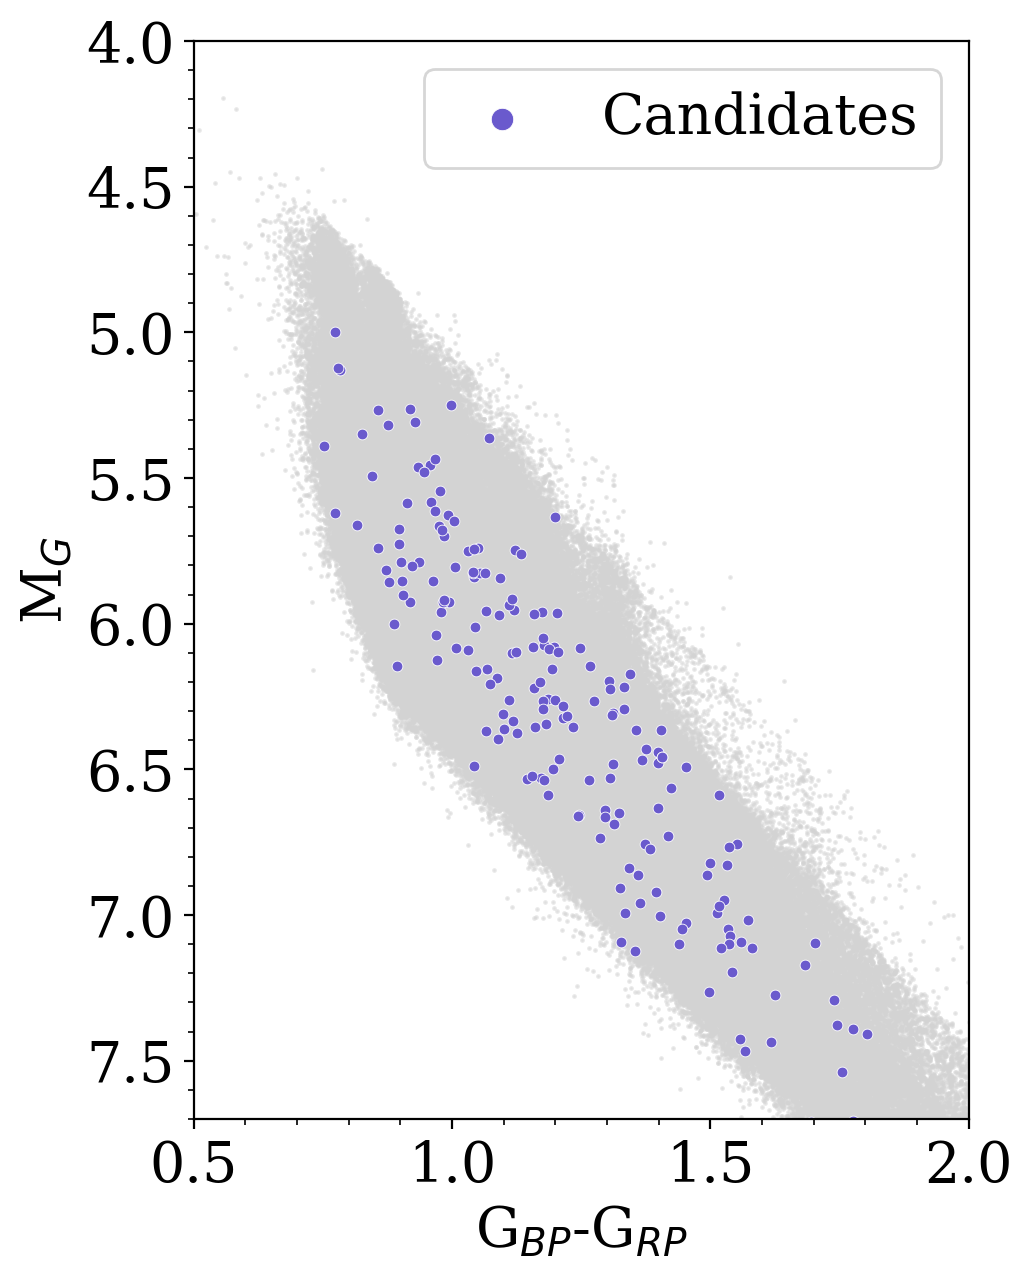

In [207]:
plt.figure(figsize=(5, 7))

sel = table['Ndips']==0
            
plt.scatter(table['bp_rp_gaia'][sel], dist_modM(table['phot_g_mean_mag_gaia'][sel], 
                                               table['distance_gspphot_gaia'][sel]), s=0.5,color='lightgray', alpha=0.5)


sel = (table['Ndips']==1) & (table['best_dip_frac1sig']>3) & \
        (table['loc_dip_back']<15) &  (table['loc_dip_forward']<15) &  \
        (table['best_dip_power']>6)

plt.scatter(table['bp_rp_gaia'][sel], dist_modM(table['phot_g_mean_mag_gaia'][sel], 
                                               table['distance_gspphot_gaia'][sel]), s=15, 
            color='slateblue', edgecolor='w', lw=0.3, 
           label='Candidates')


lgnd = plt.legend()
lgnd.legendHandles[0]._sizes = [65]


plt.ylim(plt.ylim(4, 7.7)[::-1])
plt.xlim(0.5, 2)
plt.minorticks_on()
plt.xlabel("G$_{BP}$-G$_{RP}$")
plt.ylabel("M$_{G}$")